In [1]:
# Importing the libraries
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv("Pulsar_Star_data.csv")
df = pd.DataFrame(data)
df.shape

(12528, 9)

In [3]:
df.head()

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
0,121.156250,48.372971,0.375485,-0.013165,3.168896,18.399367,7.449874,65.159298,0
1,76.968750,36.175557,0.712898,3.388719,2.399666,17.570997,9.414652,102.722975,0
2,130.585938,53.229534,0.133408,-0.297242,2.743311,22.362553,8.508364,74.031324,0
3,156.398438,48.865942,-0.215989,-0.171294,17.471572,26.351318,2.958066,7.197842,0
4,84.804688,36.117659,0.825013,3.274125,2.790134,20.618009,8.405008,76.291128,0


In [ ]:
# cleaning

In [4]:
col_names = df.columns
col_names

Index([' Mean of the integrated profile',
       ' Standard deviation of the integrated profile',
       ' Excess kurtosis of the integrated profile',
       ' Skewness of the integrated profile', ' Mean of the DM-SNR curve',
       ' Standard deviation of the DM-SNR curve',
       ' Excess kurtosis of the DM-SNR curve', ' Skewness of the DM-SNR curve',
       'target_class'],
      dtype='object')

In [5]:
df.columns = df.columns.str.strip()
df.columns

Index(['Mean of the integrated profile',
       'Standard deviation of the integrated profile',
       'Excess kurtosis of the integrated profile',
       'Skewness of the integrated profile', 'Mean of the DM-SNR curve',
       'Standard deviation of the DM-SNR curve',
       'Excess kurtosis of the DM-SNR curve', 'Skewness of the DM-SNR curve',
       'target_class'],
      dtype='object')

In [6]:
# rename column names

df.columns = ['IP Mean', 'IP Sd', 'IP Kurtosis', 'IP Skewness', 
              'DM-SNR Mean', 'DM-SNR Sd', 'DM-SNR Kurtosis', 'DM-SNR Skewness', 'target_class']
df.columns

Index(['IP Mean', 'IP Sd', 'IP Kurtosis', 'IP Skewness', 'DM-SNR Mean',
       'DM-SNR Sd', 'DM-SNR Kurtosis', 'DM-SNR Skewness', 'target_class'],
      dtype='object')

In [8]:
# check distribution of target_class column

df['target_class'].value_counts()

0    11375
1     1153
Name: target_class, dtype: int64

In [9]:
# view the percentage distribution of target_class column

df['target_class'].value_counts()/np.float(len(df))

0    0.907966
1    0.092034
Name: target_class, dtype: float64

In [10]:
# view summary of dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12528 entries, 0 to 12527
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   IP Mean          12528 non-null  float64
 1   IP Sd            12528 non-null  float64
 2   IP Kurtosis      12528 non-null  float64
 3   IP Skewness      12528 non-null  float64
 4   DM-SNR Mean      12528 non-null  float64
 5   DM-SNR Sd        12528 non-null  float64
 6   DM-SNR Kurtosis  12528 non-null  float64
 7   DM-SNR Skewness  12528 non-null  float64
 8   target_class     12528 non-null  int32  
dtypes: float64(8), int32(1)
memory usage: 832.1 KB


In [11]:
# check for missing values in variables

df.isnull().sum()

IP Mean            0
IP Sd              0
IP Kurtosis        0
IP Skewness        0
DM-SNR Mean        0
DM-SNR Sd          0
DM-SNR Kurtosis    0
DM-SNR Skewness    0
target_class       0
dtype: int64

In [12]:
# view summary statistics in numerical variables

round(df.describe(),2)

,IP Mean,IP Sd,IP Kurtosis,IP Skewness,DM-SNR Mean,DM-SNR Sd,DM-SNR Kurtosis,DM-SNR Skewness,target_class
count,12528.00,12528.00,12528.00,12528.00,12528.00,12528.00,12528.00,12528.00,12528.00
mean,111.04,46.52,0.48,1.78,12.67,26.35,8.33,105.53,0.09
std,25.67,6.80,0.99,6.21,29.61,18.67,4.54,104.69,0.29
min,5.81,24.77,-1.74,-1.79,0.21,7.37,-3.14,-1.98,0.00
25%,100.87,42.36,0.06,-0.19,1.91,14.76,5.80,38.13,0.00
50%,115.18,46.93,0.29,0.20,2.79,19.62,8.45,87.80,0.00
75%,127.11,50.98,0.48,0.93,5.41,26.47,10.73,135.77,0.00
max,189.73,91.81,8.07,68.10,222.42,110.64,34.54,1191.00,1.00


In [13]:
# Declare feature vector and target variable 
X = df.drop(['target_class'], axis=1)

y = df['target_class']

In [14]:
# split X and y into training and testing sets

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [15]:
# check the shape of X_train and X_test

X_train.shape, X_test.shape

((10022, 8), (2506, 8))

In [ ]:
# Feature Scaling

In [16]:
cols = X_train.columns

In [17]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [18]:
X_train = pd.DataFrame(X_train, columns=[cols])
X_test = pd.DataFrame(X_test, columns=[cols])
X_train.describe()

,IP Mean,IP Sd,IP Kurtosis,IP Skewness,DM-SNR Mean,DM-SNR Sd,DM-SNR Kurtosis,DM-SNR Skewness
count,1.002200e+04,1.002200e+04,1.002200e+04,1.002200e+04,1.002200e+04,1.002200e+04,1.002200e+04,1.002200e+04
mean,-2.580698e-16,-7.827172e-16,2.197847e-17,-1.807907e-17,-3.633538e-17,2.321919e-17,-5.253564e-16,1.339978e-16
std,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00
min,-4.059253e+00,-3.121855e+00,-2.221072e+00,-5.703669e-01,-4.225211e-01,-1.014727e+00,-2.526379e+00,-1.026846e+00
25%,-3.943394e-01,-6.101706e-01,-4.261366e-01,-3.175801e-01,-3.653436e-01,-6.205702e-01,-5.589324e-01,-6.456738e-01
50%,1.619199e-01,5.986146e-02,-1.916573e-01,-2.549120e-01,-3.355278e-01,-3.625238e-01,2.442155e-02,-1.680021e-01
75%,6.265131e-01,6.579129e-01,-6.261145e-03,-1.397269e-01,-2.459675e-01,1.653286e-02,5.276848e-01,2.883008e-01
max,3.045294e+00,6.647182e+00,7.578695e+00,1.045442e+01,7.074053e+00,4.496240e+00,5.769814e+00,1.036456e+01


In [19]:
#Run SVM with default hyperparameters 
# import SVC classifier # C=1.0

from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
svc=SVC() # instantiate classifier with default hyperparameters c=1.0
svc.fit(X_train,y_train) # fit classifier to training set
y_pred=svc.predict(X_test)# make predictions on test set 
accuracy = accuracy_score(y_test, y_pred) # Evaluates the model performance # 0.9796
# compute and print accuracy score
print(f'Model accuracy score with default hyperparameters: {accuracy*100:0.2f}%')


Model accuracy score with default hyperparameters: 97.96%


In [20]:
#Run SVM with rbf kernel and C=100.00
svc=SVC(C=100.0) # instantiate classifier with rbf kernel and C=100
svc.fit(X_train,y_train)# fit classifier to training set
y_pred=svc.predict(X_test)# make predictions on test set
accuracy = accuracy_score(y_test, y_pred) # Evaluates the model performance # 0.9804###

# compute and print accuracy score
print(f'Model accuracy score with rbf kernel and C=100.0 : {accuracy*100:0.2f}%')

Model accuracy score with rbf kernel and C=100.0 : 98.04%


In [21]:

svc_score_train=svc.score(X_train, y_train) # decimal 
svc_score_test=svc.score(X_test, y_test)# decimal 
print(f'Training set score: {svc_score_train*100:.4f}%')
print(f'Test set score: {svc_score_test*100:.4f}%')

Training set score: 98.3337%
Test set score: 98.0447%


In [22]:
#y_pred_train = svc.predict(X_train)
y_pred_test = svc.predict(X_test)

In [23]:
# Print the Confusion Matrix and slice it into four pieces
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_test)
print('Confusion matrix\n\n', cm)
print('\nTrue Positives(TP) = ', cm[0,0]) # 100 -> pulsar star
print('\nTrue Negatives(TN) = ', cm[1,1]) # 105 -> not pulsar star
print('\nFalse Positives(FP) = ', cm[0,1]) # 99 -> this is not pulsar star, but it is pulsar star
print('\nFalse Negatives(FN) = ', cm[1,0]) # 150 -> 

Confusion matrix

 [[2276    9]
 [  40  181]]

True Positives(TP) =  2276

True Negatives(TN) =  181

False Positives(FP) =  9

False Negatives(FN) =  40


<AxesSubplot:>

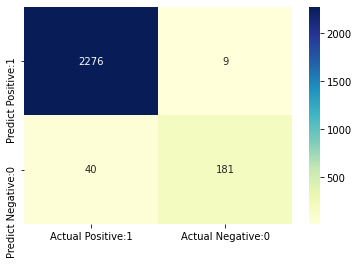

In [24]:
# visualize confusion matrix with seaborn heatmap

cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')